# Artificial Nerual Networks

## Implementing MLPs with sklearn

### Regression MLPs

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

In [7]:
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [9]:
y_val_pred = pipeline.predict(X_val)

In [10]:
rmse_val = root_mean_squared_error(y_val, y_val_pred)

In [11]:
rmse_val

0.5053326657968437

* The MLPRegressor class uses the mean squared error, which is usually what you want
for regression, but if you have a lot of outliers in the training set, you may prefer to
use the mean absolute error instead. Alternatively, you may want to use the Huber
loss, which is a combination of both. It is quadratic when the error is smaller than
a threshold δ (typically 1) but linear when the error is larger than δ. The linear part
makes it less sensitive to outliers than the mean squared error, and the quadratic
part allows it to converge faster and be more precise than the mean absolute error.
However, MLPRegressor only supports the MSE

* Typical regrssion MLP architecture:

| Hyperparameter | Typical value  |
|----------------|----------------|
| # hidden layer | Depends on the problem, but typically 1 to 5 |
| # neurons per hidden layer | Depends on the problem, but typically 10 to 100 |
| # output neurons | 1 per prediction dimension |
| Hidden activation | ReLU |
| Output activation | None, or ReLU/softplus (if positive outputs) or sigmoid/tanh(if bounded output)
| Loss function | MSE, or Huber if outliers

### Classification MLPs

* Typical classification MLP architecture

| Hyperparameter | Binary classification | Multilabel binary classification | Multiclass classification|
|----------------|-----------------------|----------------------------------|--------------------------|
| # hidden layer | Typically 1 to 5 layers, depending on the task|
| # output neurons| 1 | 1 per binary label | 1 per class |
| Output layer activation | Sigmoid | Sigmoid | Softmax |
| Loss function | X-entropy | X-entropy | X-entropy |




## Implementing MLPs with Keras

### Building a image classifier using the sequential API

In [12]:
import tensorflow as tf

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [40]:
(X_train, y_train), (X_test, y_test) = fashion_mnist

num_instances_val = 5000
X_train, y_train = X_train[:-num_instances_val], y_train[:-num_instances_val]
X_val, y_val = X_train[-num_instances_val:], y_train[-num_instances_val:]

In [41]:
X_train.shape, X_val.shape, X_test.shape

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28))

In [42]:
X_train, X_val, X_test = X_train/ 255., X_val/255., X_test/255.

In [17]:
import matplotlib.pyplot as plt

def plot_image(image_data, cmap='binary', title=None, figsize=None):
    plt.imshow(image_data,cmap=cmap)
    plt.axis('off')
    plt.title(title)

    if figsize:
        plt.figure(figsize=figsize)

In [18]:
import numpy as np

class_names = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [19]:
class_names[y_train[0]]

np.str_('Ankle boot')

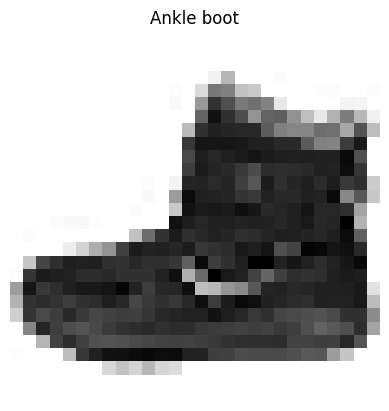

In [20]:
plot_image(X_train[0], title=class_names[y_train[0]])

In [21]:
def plot_grid_images(images, num_rows, num_cols, titles=None, figsize=None):
    if figsize:
        plt.figure(figsize=figsize)
    for row in range(num_rows):
        for col in range(num_cols):
            index = col + (num_cols * row)
            plt.subplot(num_rows, num_cols, index + 1)
            plot_image(images[index], title=titles[index])
    plt.subplots_adjust(wspace=0.2, hspace=0.5)

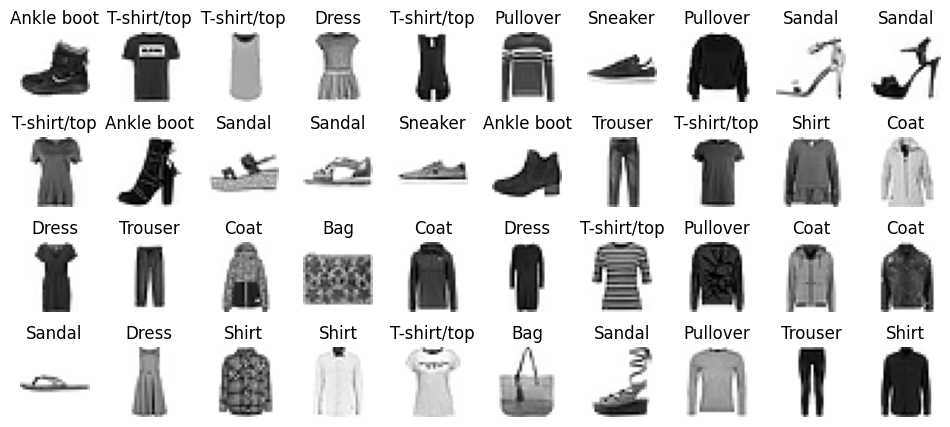

In [22]:
plot_grid_images(X_train, num_rows=4, num_cols=10, titles=class_names[y_train], figsize=(12,5))

In [23]:
tf.random.set_seed(42)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                   │ (None, 784)                │               0 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense (Dense)                       │ (None, 300)                │         235,500 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                     │ (None, 100)                │          30,100 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                     │ (None, 10)                 │           1,010 │
└─────────────────────────────────────┴────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

All global state managed by Keras is stored in a Keras session,
which you can clear using 
```python
tf.keras.backend.clear_session()
```
In particular, this resets the name counters.

In [26]:
# tf.keras.utils.plot_model(model, show_shapes=True)

* [Categorical Cross Entropy & Sparse Categorical Cross Entropy](https://medium.com/@shireenchand/choosing-between-cross-entropy-and-sparse-cross-entropy-the-only-guide-you-need-abea92c84662)

In [27]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

* This code requires explanation. We use the `sparse_categorical_crossentropy`
loss because we have sparse labels (i.e., for each instance, there is just a target class
index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g.,
`[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), then we would
need to use the `categorical_crossentropy` loss instead. If we were doing binary
classification or multilabel binary classification, then we would use the `sigmoid`
activation function in the output layer instead of the `softmax` activation function,
and we would use the `binary_crossentropy` loss.
* If you want to convert sparse labels (i.e., class indices) to one-hot
vector labels, use the `tf.keras.utils.to_categorical()` func‐
tion. To go the other way round, use the `np.argmax()` function
with axis=1.
* When using the SGD optimizer, it is important to tune the learn‐
ing rate. So, you will generally want to use `optimizer=tf.keras.
optimizers.SGD(learning_rate=__???__)` to set the learning rate,
rather than `optimizer="sgd"`, which defaults to a learning rate of
0.01.

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6893 - loss: 0.9735 - val_accuracy: 0.8122 - val_loss: 0.5360
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8247 - loss: 0.5107 - val_accuracy: 0.8320 - val_loss: 0.4783
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8415 - loss: 0.4566 - val_accuracy: 0.8404 - val_loss: 0.4467
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8511 - loss: 0.4257 - val_accuracy: 0.8502 - val_loss: 0.4237
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.4032 - val_accuracy: 0.8574 - val_loss: 0.4060
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8647 - loss: 0.3853 - val_accuracy: 0.8606 - val_loss: 0.3929
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8694 - loss: 0.3712 - val_accuracy: 0.8648 - val_loss: 0.3812
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8732 - loss: 0.3587 -

* Shape errors are quite common, especially when getting started,
so you should familiarize yourself with the error messages:
try fitting a model with inputs and/or labels of the wrong
shape, and see the errors you get. Similarly, try compiling
the model with `loss="categorical_crossentropy"` instead of
`loss="sparse_categorical_crossentropy"`. Or you can remove
the Flatten layer.

In [29]:
import pandas as pd

<Axes: xlabel='Epochs'>

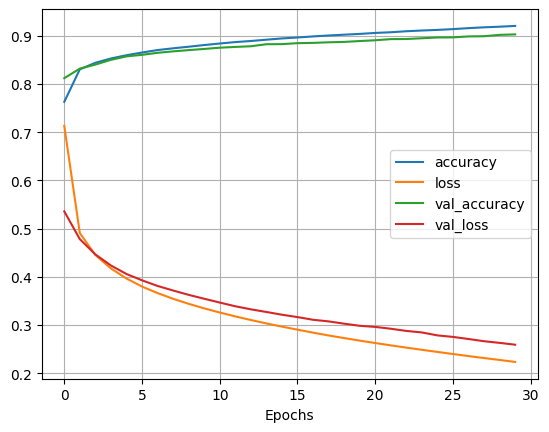

In [34]:
pd.DataFrame(history.history).plot(grid=True, xlabel='Epochs')

In [59]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8732 - loss: 0.3713  


[0.3671729862689972, 0.8719000220298767]

In [51]:
X_new = X_test[:3]
y_new_proba = model.predict(X_new).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [53]:
y_new_proba

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.  , 0.01, 0.  , 0.7 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
y_new_pred = y_new_proba.argmax(axis=1)
y_new_pred

array([9, 2, 1])

In [57]:
class_names[y_new_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [58]:
class_names[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a regression MLPs using the Sequential API

In [86]:
housing = fetch_california_housing()

In [87]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [88]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

In [89]:
X_train.shape, X_val.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8, )),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [91]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization)     │ (None, 8)                  │              17 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                    │ (None, 50)                 │             450 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                    │ (None, 50)                 │           2,550 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                    │ (None, 50)                 │           2,550 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                    │ (None, 1)                  │              51 │
└─────────────────────────────────────┴────────────────────────────┴─────────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [92]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

In [93]:
model.layers[0].name

'normalization_3'

In [94]:
model.layers[0].adapt(X_train)

In [95]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - RootMeanSquaredError: 1.3046 - loss: 1.8487 - val_RootMeanSquaredError: 0.6499 - val_loss: 0.4224
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6379 - loss: 0.4075 - val_RootMeanSquaredError: 0.6668 - val_loss: 0.4446
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6091 - loss: 0.3713 - val_RootMeanSquaredError: 0.8428 - val_loss: 0.7103
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5943 - loss: 0.3534 - val_RootMeanSquaredError: 1.2700 - val_loss: 1.6129
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5872 - loss: 0.3449 - val_RootMeanSquaredError: 1.1520 - val_loss: 1.3271
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5754 - loss: 0.3313 - val_RootMeanSquaredError: 1.1276 - val_loss: 1.2715
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5693 - los

In [96]:
model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.5367 - loss: 0.2882 


[0.29298096895217896, 0.5412771701812744]

In [97]:
X_new = X_test[:3]
y_new_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [98]:
y_new_pred

array([[0.52418447],
       [1.31409   ],
       [5.062684  ]], dtype=float32)

<Axes: xlabel='Epochs'>

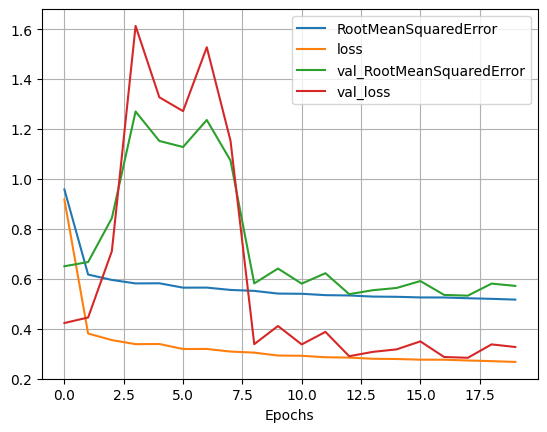

In [99]:
pd.DataFrame(history.history).plot(grid=True, xlabel='Epochs')